In [1]:
import pandas as pd

# load dataset

In [105]:
train = pd.read_csv("train_bike.csv", parse_dates=["datetime"])

print(train.shape)
train.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [106]:
test = pd.read_csv("test_bike.csv", parse_dates=["datetime"])

print(test.shape)
test.head()

(6493, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [107]:
train["datetime-year"] = train["datetime"].dt.year
train["datetime-dayofweek"] = train["datetime"].dt.dayofweek
train["datetime-hour"] = train["datetime"].dt.hour

print(train.shape)
train[["datetime", "datetime-year", "datetime-dayofweek", "datetime-hour"]].head()

(10886, 15)


,datetime,datetime-year,datetime-dayofweek,datetime-hour
0,2011-01-01 00:00:00,2011,5,0
1,2011-01-01 01:00:00,2011,5,1
2,2011-01-01 02:00:00,2011,5,2
3,2011-01-01 03:00:00,2011,5,3
4,2011-01-01 04:00:00,2011,5,4


In [108]:
test["datetime-year"] = test["datetime"].dt.year
test["datetime-month"] = test["datetime"].dt.month
test["datetime-dayofweek"] = test["datetime"].dt.dayofweek
test["datetime-hour"] = test["datetime"].dt.hour

print(test.shape)
test[["datetime", "datetime-year", "datetime-dayofweek", "datetime-hour"]].head()

(6493, 13)


,datetime,datetime-year,datetime-dayofweek,datetime-hour
0,2011-01-20 00:00:00,2011,3,0
1,2011-01-20 01:00:00,2011,3,1
2,2011-01-20 02:00:00,2011,3,2
3,2011-01-20 03:00:00,2011,3,3
4,2011-01-20 04:00:00,2011,3,4


# preprocessing

In [246]:
train["prev-temp"] = train["temp"].shift()

print(train.shape)
train[["temp", "prev-temp"]].head(10)
temp_margin = train["prev-temp"] - train["temp"]
train["temp_margin"] = temp_margin
train["temp_margin"].head(20)

(10886, 29)


0      NaN
1     0.82
2     0.00
3    -0.82
4     0.00
5     0.00
6     0.82
7     0.82
8    -1.64
9    -3.28
10   -2.46
11    0.82
12   -2.46
13   -1.64
14    0.00
15    0.82
16    0.82
17   -0.82
18    0.82
19    0.00
Name: temp_margin, dtype: float64

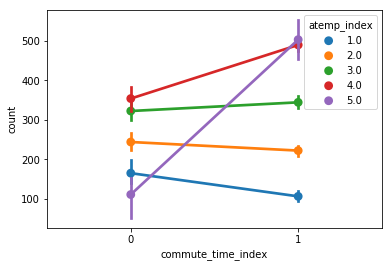

In [247]:
sns.pointplot(data=train, x="commute_time_index", y="count",hue = "atemp_index", fit_reg= False)

In [248]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [249]:
train["commute_time_morning"] = (train["datetime-hour"]>6)&(train["datetime-hour"]<9)
train["commute_time_evening"] = (train["datetime-hour"]>16)&(train["datetime-hour"]<21)
train["cold_atemp_strong"] = (train["atemp"] <=10)
train["cold_atemp_weak"] = (train["atemp"]>10)&(train["atemp"]<=20)
train["warm_atemp_weak"] = (train["atemp"]>20)&(train["atemp"]<=30)
train["warm_atemp_strong"] = (train["atemp"]>30)&(train["atemp"]<=40)
train["hot_atemp"] = (train["atemp"] >40)

In [250]:
train.loc[train["commute_time_morning"],"commute_time_index"] = 0
train.loc[train["commute_time_evening"],"commute_time_index"] = 1

In [251]:
test.loc[test["commute_time_morning"],"commute_time_index"] = 0
test.loc[test["commute_time_evening"],"commute_time_index"] = 1

In [252]:
train.loc[train["cold_atemp_strong"],"atemp_index"] = 1
train.loc[train["cold_atemp_weak"],"atemp_index"] = 2
train.loc[train["warm_atemp_weak"],"atemp_index"] = 3
train.loc[train["warm_atemp_strong"],"atemp_index"] = 4
train.loc[train["hot_atemp"],"atemp_index"] = 5

train["atemp_index"].head()

0    2.0
1    2.0
2    2.0
3    2.0
4    2.0
Name: atemp_index, dtype: float64

In [253]:
test.loc[test["cold_atemp_strong"],"atemp_index"] = 1
test.loc[test["cold_atemp_weak"],"atemp_index"] = 2
test.loc[test["warm_atemp_weak"],"atemp_index"] = 3
test.loc[test["warm_atemp_strong"],"atemp_index"] = 4
test.loc[test["hot_atemp"],"atemp_index"] = 5

test["atemp_index"].head()

0    2.0
1    2.0
2    2.0
3    2.0
4    2.0
Name: atemp_index, dtype: float64

In [254]:
train["hot_morning"] = (train["atemp_index"]>=4)&(train["commute_time_index"] == 0)
train["hot_evening"] = (train["atemp_index"]>=4)&(train["commute_time_index"] == 1)

In [255]:
train.loc[train["atemp_index"]>=4]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,warm_atemp_weak,warm_atemp_strong,hot_atemp,atemp_index,commute_time_index,hot_morning,hot_evening,prev-temp,temp_margin,margin_big
819,2011-02-17 14:00:00,1,0,1,1,24.60,31.060,31,15.0013,26,...,False,True,False,4.0,NaN,False,False,22.14,-2.46,0
820,2011-02-17 15:00:00,1,0,1,1,24.60,30.305,28,16.9979,15,...,False,True,False,4.0,NaN,False,False,24.60,0.00,0
842,2011-02-18 13:00:00,1,0,1,1,24.60,31.060,43,12.9980,45,...,False,True,False,4.0,NaN,False,False,20.50,-4.10,0
843,2011-02-18 14:00:00,1,0,1,1,27.06,31.060,36,19.9995,73,...,False,True,False,4.0,NaN,False,False,24.60,-2.46,0
844,2011-02-18 15:00:00,1,0,1,1,27.06,31.060,36,22.0028,55,...,False,True,False,4.0,NaN,False,False,27.06,0.00,0
845,2011-02-18 16:00:00,1,0,1,1,27.06,31.060,36,19.0012,68,...,False,True,False,4.0,NaN,False,False,27.06,0.00,0
846,2011-02-18 17:00:00,1,0,1,1,27.06,31.060,34,23.9994,52,...,False,True,False,4.0,1,False,True,27.06,0.00,0
847,2011-02-18 18:00:00,1,0,1,1,26.24,31.060,33,22.0028,29,...,False,True,False,4.0,1,False,True,27.06,0.82,0
848,2011-02-18 19:00:00,1,0,1,1,25.42,31.060,29,39.0007,16,...,False,True,False,4.0,1,False,True,26.24,0.82,0
849,2011-02-18 20:00:00,1,0,1,1,24.60,31.060,31,12.9980,19,...,False,True,False,4.0,1,False,True,25.42,0.82,0


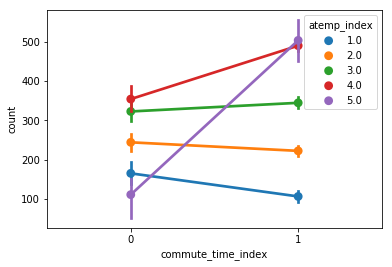

In [256]:
sns.pointplot(data=train, x="commute_time_index", y="count",hue = "atemp_index", fit_reg= False)

#엄청 더울때..아침보다 저녁시간에 많이 탄다 atemp_index가 4이상

In [257]:
train["commute_time_morning"].head()

0    False
1    False
2    False
3    False
4    False
Name: commute_time_morning, dtype: bool

In [258]:
test["commute_time_morning"] = (test["datetime-hour"]>6)&(test["datetime-hour"]<9)
test["commute_time_evening"] = (test["datetime-hour"]>16)&(test["datetime-hour"]<21)
test["cold_atemp_strong"] = (test["atemp"] <=10)
test["cold_atemp_weak"] = (test["atemp"]>10)&(test["atemp"]<=20)
test["warm_atemp_weak"] = (test["atemp"]>20)&(test["atemp"]<=30)
test["warm_atemp_strong"] = (test["atemp"]>30)&(test["atemp"]<=40)
test["hot_atemp"] = (test["atemp"] >40)
test["hot_morning"] = (test["atemp_index"]>=4)&(test["commute_time_index"] == 0)
test["hot_evening"] = (test["atemp_index"]>=4)&(test["commute_time_index"] == 1)

In [259]:
feature_names = ["season", "holiday", "workingday", "weather", 
                 "humidity","atemp",
                 "datetime-year", "datetime-dayofweek",
                 "datetime-hour",
                 "commute_time_morning","commute_time_evening","hot_morning","hot_evening"]

In [260]:
X_train = train[feature_names]

print(X_train.shape)
X_train.head(10)

(10886, 13)


,season,holiday,workingday,weather,humidity,atemp,datetime-year,datetime-dayofweek,datetime-hour,commute_time_morning,commute_time_evening,hot_morning,hot_evening
0,1,0,0,1,81,14.395,2011,5,0,False,False,False,False
1,1,0,0,1,80,13.635,2011,5,1,False,False,False,False
2,1,0,0,1,80,13.635,2011,5,2,False,False,False,False
3,1,0,0,1,75,14.395,2011,5,3,False,False,False,False
4,1,0,0,1,75,14.395,2011,5,4,False,False,False,False
5,1,0,0,2,75,12.880,2011,5,5,False,False,False,False
6,1,0,0,1,80,13.635,2011,5,6,False,False,False,False
7,1,0,0,1,86,12.880,2011,5,7,True,False,False,False
8,1,0,0,1,75,14.395,2011,5,8,True,False,False,False
9,1,0,0,1,76,17.425,2011,5,9,False,False,False,False


In [261]:
c_test = test[feature_names]

print(c_test.shape)
c_test.head()

(6493, 13)


,season,holiday,workingday,weather,humidity,atemp,datetime-year,datetime-dayofweek,datetime-hour,commute_time_morning,commute_time_evening,hot_morning,hot_evening
0,1,0,1,1,56,11.365,2011,3,0,False,False,False,False
1,1,0,1,1,56,13.635,2011,3,1,False,False,False,False
2,1,0,1,1,56,13.635,2011,3,2,False,False,False,False
3,1,0,1,1,56,12.880,2011,3,3,False,False,False,False
4,1,0,1,1,56,12.880,2011,3,4,False,False,False,False


In [213]:
r_test = test[feature_names]

print(r_test.shape)
r_test.head()

(6493, 13)


,season,holiday,workingday,weather,humidity,atemp,datetime-year,datetime-dayofweek,datetime-hour,commute_time_morning,commute_time_evening,hot_morning,hot_evening
0,1,0,1,1,56,11.365,2011,3,0,False,False,False,False
1,1,0,1,1,56,13.635,2011,3,1,False,False,False,False
2,1,0,1,1,56,13.635,2011,3,2,False,False,False,False
3,1,0,1,1,56,12.880,2011,3,3,False,False,False,False
4,1,0,1,1,56,12.880,2011,3,4,False,False,False,False


In [214]:
label_name_c = "casual"

c_train = train[label_name_c]

print(c_train.shape)
c_train.head()

(10886,)


0    3
1    8
2    5
3    3
4    0
Name: casual, dtype: int64

In [215]:
label_name_r = "registered"

r_train = train[label_name_r]

print(r_train.shape)
r_train.head()

(10886,)


0    13
1    32
2    27
3    10
4     1
Name: registered, dtype: int64

In [216]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=37)
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=37, verbose=0, warm_start=False)

In [217]:
import numpy as np
from sklearn.metrics import make_scorer

def rmsle(predict, actual):
    predict = np.array(predict)
    actual = np.array(actual)
    
    log_predict = np.log(predict + 1)
    log_actual = np.log(actual + 1)
    
    difference = log_predict - log_actual
    difference = np.square(difference)
    
    mean_difference = difference.mean()
    
    score = np.sqrt(mean_difference)
    
    return score

rmsle_scorer = make_scorer(rmsle)
rmsle_scorer

make_scorer(rmsle)

In [218]:
from sklearn.model_selection import cross_val_score

score_c = cross_val_score(model, X_train, c_train,
                        cv=20, scoring=rmsle_scorer).mean()
score_r = cross_val_score(model, X_train, r_train,
                        cv=20, scoring=rmsle_scorer).mean()


print("Score = {0:.5f}".format(score_c))
print("Score = {0:.5f}".format(score_r))

Score = 0.62776
Score = 0.36453


In [219]:
model.fit(X_train, c_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=37, verbose=0, warm_start=False)

In [220]:
predictions_c = model.predict(c_test)

print(predictions_c.shape)
predictions_c[0:10]

(6493,)


array([ 1.3,  0.5,  0.9,  1.6,  0.8,  0.2,  2.3,  1.9,  6. ,  4.4])

In [221]:
model.fit(X_train, r_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=37, verbose=0, warm_start=False)

In [222]:
model.fit(X_train, r_train)
predictions_r = model.predict(r_test)

print(predictions_r.shape)
predictions_r[0:10]

(6493,)


array([  11.1 ,    4.85,    2.3 ,    1.7 ,    1.5 ,    5.3 ,   36.8 ,
        100.2 ,  234.3 ,  128.2 ])

In [223]:
predictions = predictions_r + predictions_c
predictions[0:10]

array([  12.4 ,    5.35,    3.2 ,    3.3 ,    2.3 ,    5.5 ,   39.1 ,
        102.1 ,  240.3 ,  132.6 ])

In [224]:
submit = pd.read_csv("sampleSubmission.csv")

print(submit.shape)
submit.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [225]:
submit["count"] = predictions

print(submit.shape)
submit.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,12.40
1,2011-01-20 01:00:00,5.35
2,2011-01-20 02:00:00,3.20
3,2011-01-20 03:00:00,3.30
4,2011-01-20 04:00:00,2.30


In [226]:
submit.to_csv("baseline-script.csv", index=False)  #0.42075